AVG RARE: 0.4906832298136646
AVG WELL: 0.44401544401544396
0.179907283361
0.0419895482083


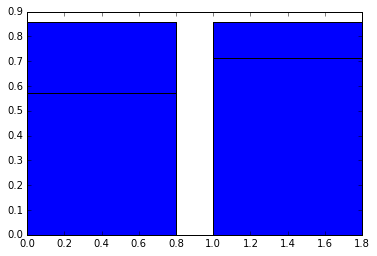

In [14]:
import csv
import statistics
import matplotlib.pyplot as plt
import scipy.stats as st
import random as rand
%matplotlib inline
    
f = open('steak-risk-survey.csv', 'r')
csv_f = csv.reader(f)
how_risky = []
steak_questionmark = []
yes_steak_risky = []
how_steaky = []
lotteries = []
skydivers = []
gamblers = []
cheaters = []
speeders = []
for row in csv_f :
    risks = 0
    if(row[1]=="Lottery B"):
        risks+=1
        lotteries.append(1)
    else:
        lotteries.append(0)
    for i in range (2, 8):
        if(row[i]=="Yes"):
            risks+=1
            
    if(row[5]=="Yes"):
        skydivers.append(1)
    else:
        skydivers.append(0)
        
    if(row[4]=="Yes"):
        gamblers.append(1)
    else:
        gamblers.append(0)
        
    if(row[7] == "Yes"):
        cheaters.append(1)
    else:
        cheaters.append(0)
        
    if(row[6] == "Yes"):
        speeders.append(1)
    else:
        speeders.append(0)
        

    #this is a coefficent of risk.  
    #This coefficent is defined the percentage of possible risky activities someone engages in
    how_risky.append(risks/7)
    
    #U LIKE STEAK??????
    if(row[8]=="Yes"):
        steak_questionmark.append(1)
        yes_steak_risky.append(risks/7)
        if(row[9]=="Rare"):
            how_steaky.append(4)
        elif(row[9]=="Medium rare"):
            how_steaky.append(3)
        elif(row[9]=="Medium"):
            how_steaky.append(2)
        elif(row[9]=="Medium Well"):
            how_steaky.append(1)
        elif(row[9]=="Well"):
            how_steaky.append(0)
    else:
        steak_questionmark.append(0)
        

#remove the first three element (column headers and other unneccesary data)
del how_risky[0]
del how_risky[0]
del how_risky[0]
del steak_questionmark[0]
del steak_questionmark[0]
del steak_questionmark[0]


plt.bar(steak_questionmark, how_risky)

#calculate averages
rare_count = 0
well_count = 0
rare = 0
well = 0
for i in range(len(how_steaky)):
    if(how_steaky[i] == 4):
        rare += yes_steak_risky[i]
        rare_count += 1
    elif(how_steaky[i] == 1):
        well += yes_steak_risky[i]
        well_count += 1
        
print("AVG RARE:",rare/rare_count)
print("AVG WELL:",well/well_count)

risky_steaks = st.pearsonr(how_risky, steak_questionmark)
yes_risky_steaks = st.pearsonr(yes_steak_risky, how_steaky)
print(risky_steaks[0])
print(yes_risky_steaks[0]) 

(0.041153940940536635, 0.33448682970137822)


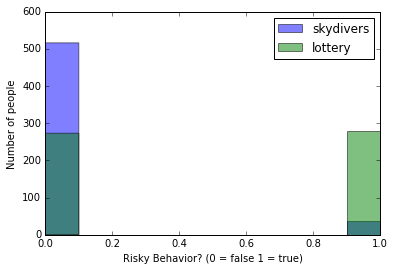

In [17]:
plt.hist(skydivers, alpha=0.5, label='skydivers')
plt.hist(lotteries, alpha=0.5, label='lottery')
plt.xlabel("Risky Behavior? (0 = false 1 = true)")
plt.ylabel("Number of people")
plt.legend(loc='upper right')
print(st.pearsonr(skydivers, lotteries))

No correlation here!!

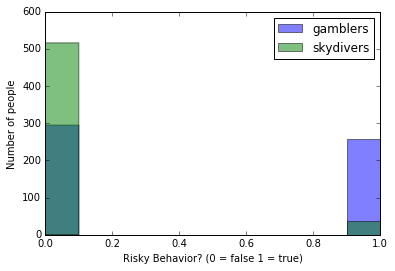

In [8]:
plt.hist(gamblers, alpha=0.5, label='gamblers')
plt.hist(skydivers, alpha=0.5, label='skydivers')
plt.xlabel("Risky Behavior? (0 = false 1 = true)")
plt.ylabel("Number of people")
plt.legend(loc='upper right')

Possible reverse correlation

(0.011369345600750404, 0.78983703872391642)


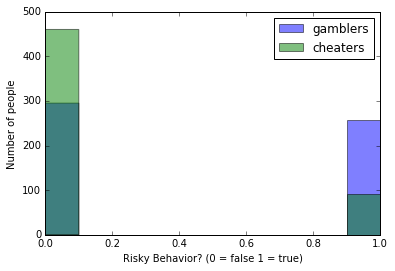

In [11]:
plt.hist(gamblers, alpha=0.5, label='gamblers')
plt.hist(cheaters, alpha=0.5, label='cheaters')
plt.xlabel("Risky Behavior? (0 = false 1 = true)")
plt.ylabel("Number of people")
plt.legend(loc='upper right')
print(st.pearsonr(gamblers, cheaters))

(0.014433756729740635, 0.7350878464412216)
(-0.014433756729740664, 0.7350878464412216)


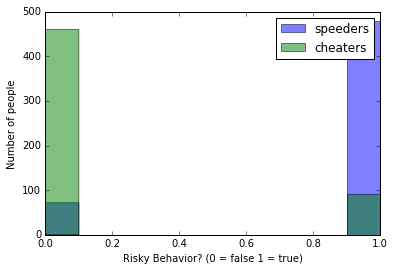

In [21]:
plt.hist(speeders, alpha=0.5, label='speeders')
newcheaters = []
for i in range(len(cheaters)):
    if(cheaters[i] == 1):
        newcheaters.append(0)
    else:
        newcheaters.append(1)
plt.hist(cheaters, alpha=0.5, label='cheaters')
plt.xlabel("Risky Behavior? (0 = false 1 = true)")
plt.ylabel("Number of people")
plt.legend(loc='upper right')
print(st.pearsonr(speeders, cheaters))
print(st.pearsonr(speeders, newcheaters))

Reverse Correlation / no correlation